In [48]:
## import necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [49]:
## merge 12 month of sales data into single csv file
#df=pd.read_csv("Sales_April_2019.csv")

files=[file for file in os.listdir("Sales_Data")]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])

all_months_data.to_csv("all_data",index=False)


In [50]:
all_data=pd.read_csv("all_data")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## clean up data

In [51]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [53]:
nan_data=all_data[all_data.isna().any(axis=1)]
nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
all_data=all_data.dropna(how="all")

all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [55]:
all_data= all_data[all_data["Order Date"].str[0:2]!="Or"]


In [56]:
## add month column 

all_data["month"]=all_data["Order Date"].str[0:2]
all_data["month"]=all_data["month"].astype('int32')

In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [58]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [59]:
## convert columns to correct types

# all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype('i')
# all_data["Price Each"]=all_data["Price Each"].astype('f')

## another way to convert
all_data["Quantity Ordered"]=pd.to_numeric( all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric( all_data["Price Each"])


In [60]:
## add sales column 

all_data["Sales"] =all_data['Quantity Ordered'] * all_data['Price Each']

In [61]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Q1 : what was the best month for sales? how much was earned that month ?

In [62]:
result=all_data.groupby('month').sum()
result

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


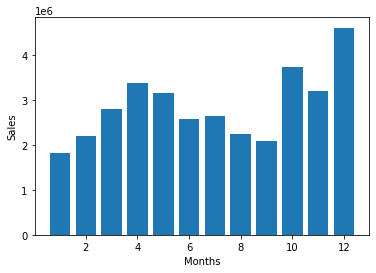

In [63]:
months = range(1,13)
plt.bar(months,result["Sales"])
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

## Q2 : which city had highest number of sales ? 

In [64]:
## add a city column 
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data["City"]=all_data['Purchase Address'].apply(lambda x:get_city(x)+"  "+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [65]:
result2 = all_data.groupby('City').sum()
result2

,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


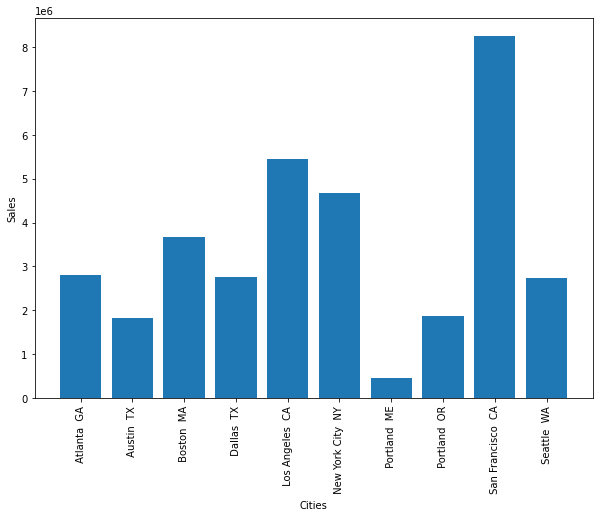

In [66]:
## plot cities with its sales 
#Cities=all_data["City"].unique()
Cities=[city for city ,df in all_data.groupby('City')]


plt.figure(figsize=(10,7))
plt.bar(Cities, result2["Sales"])

plt.xticks(Cities, rotation=90 , size=10)
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.show()

## Q3 : what time we should display our adivertisements to maximize likelihood of customer's product ? 

In [67]:
## convert Order Date column to datetime type
all_data["Order Date"]= pd.to_datetime(all_data['Order Date'])




In [68]:
## add hour column and minute
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [69]:
all_data['Hour'].value_counts()

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Hour, dtype: int64

In [70]:
all_data.groupby('Hour').count()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


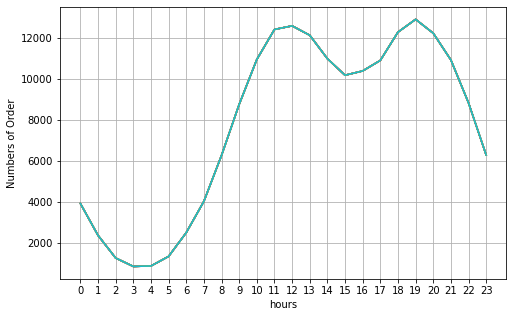

In [71]:
## plot hours with count 

hours=[hour for hour,df in all_data.groupby('Hour')]

plt.figure(figsize=(8,5))
plt.plot(hours, all_data.groupby('Hour').count());
plt.xticks(hours)
plt.xlabel("hours")
plt.ylabel("Numbers of Order")
plt.grid()
plt.show()

## what products are most often sold together ? 

In [72]:
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco CA,13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle WA,7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta GA,10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco CA,10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston MA,14,5


In [73]:
df=all_data [all_data['Order ID'].duplicated(keep=False)]

df['Groupby']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head(10)


<ipython-input-73-3d19b7013816>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Groupby']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,Groupby
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,7,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [74]:
df[['Order ID' ,'Groupby']]=df[['Order ID' ,'Groupby']].drop_duplicates()
df=df.dropna()
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,Groupby
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,7,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...,...
186781,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001",9,150.00,Dallas TX,16,48,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,iPhone,1,700.00,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",9,700.00,Boston MA,18,54,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,34in Ultrawide Monitor,1,379.99,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta GA,20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"


In [75]:
from itertools import combinations
from collections import Counter

count= Counter()

for row in df['Groupby']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list ,1)))
count

Counter({('Google Phone',): 1639,
         ('Wired Headphones',): 1674,
         ('USB-C Charging Cable',): 2111,
         ('Bose SoundSport Headphones',): 820,
         ('AAA Batteries (4-pack)',): 815,
         ('Lightning Charging Cable',): 1827,
         ('Apple Airpods Headphones',): 974,
         ('ThinkPad Laptop',): 176,
         ('34in Ultrawide Monitor',): 246,
         ('iPhone',): 1867,
         ('27in FHD Monitor',): 294,
         ('27in 4K Gaming Monitor',): 251,
         ('Macbook Pro Laptop',): 196,
         ('AA Batteries (4-pack)',): 768,
         ('Flatscreen TV',): 178,
         ('Vareebadd Phone',): 601,
         ('20in Monitor',): 159,
         ('LG Dryer',): 25,
         ('LG Washing Machine',): 28})

In [76]:
count.most_common()

[(('USB-C Charging Cable',), 2111),
 (('iPhone',), 1867),
 (('Lightning Charging Cable',), 1827),
 (('Wired Headphones',), 1674),
 (('Google Phone',), 1639),
 (('Apple Airpods Headphones',), 974),
 (('Bose SoundSport Headphones',), 820),
 (('AAA Batteries (4-pack)',), 815),
 (('AA Batteries (4-pack)',), 768),
 (('Vareebadd Phone',), 601),
 (('27in FHD Monitor',), 294),
 (('27in 4K Gaming Monitor',), 251),
 (('34in Ultrawide Monitor',), 246),
 (('Macbook Pro Laptop',), 196),
 (('Flatscreen TV',), 178),
 (('ThinkPad Laptop',), 176),
 (('20in Monitor',), 159),
 (('LG Washing Machine',), 28),
 (('LG Dryer',), 25)]

In [77]:
d=pd.DataFrame.from_dict(count, orient='index').reset_index()
d= d.rename(columns={'index':'product', 0:'count'})
d


,product,count
0,"(Google Phone,)",1639
1,"(Wired Headphones,)",1674
2,"(USB-C Charging Cable,)",2111
3,"(Bose SoundSport Headphones,)",820
4,"(AAA Batteries (4-pack),)",815
5,"(Lightning Charging Cable,)",1827
6,"(Apple Airpods Headphones,)",974
7,"(ThinkPad Laptop,)",176
8,"(34in Ultrawide Monitor,)",246
9,"(iPhone,)",1867


In [78]:
Counter(combinations(['ABCD','XZm','ABCD','XZm'], 2))

Counter({('ABCD', 'XZm'): 3,
         ('ABCD', 'ABCD'): 1,
         ('XZm', 'ABCD'): 1,
         ('XZm', 'XZm'): 1})

In [79]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [80]:
## What is products sold most ? why think it sold most ? 

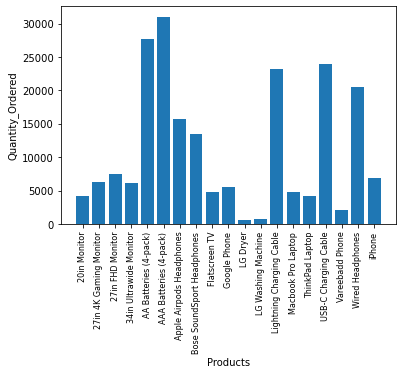

In [81]:
Product_group=all_data.groupby('Product')
Quantity_Ordered= Product_group.sum()['Quantity Ordered']

Products=[product for product,df in Product_group]


plt.bar(Products,Quantity_Ordered)
plt.xticks(rotation=90 , size=8);
plt.xlabel("Products")
plt.ylabel("Quantity_Ordered")
plt.show()

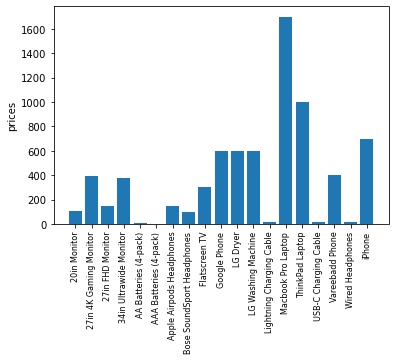

In [82]:
prices = all_data.groupby("Product").mean()["Price Each"]
products_group=[product for product,df in all_data.groupby("Product")]

plt.bar(products_group,prices)
plt.ylabel('prices')
#plt.grid()
plt.xticks(rotation=90 , size=8);
plt.show()

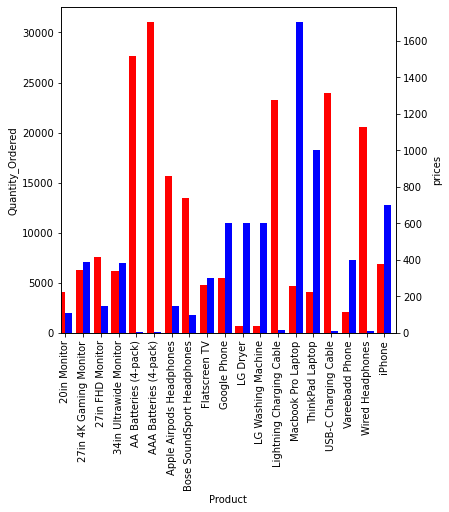

In [83]:
## add prices and Quantity Ordered with proucts 
fig = plt.figure(figsize=(6,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

Quantity_Ordered.plot(kind='bar', color='red', ax=ax, width=width, position=1)
prices.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Quantity_Ordered')
ax2.set_ylabel('prices')
plt.show()
